In [43]:
from utils.experiment_helper import DGP, ModelSpec, run_and_plot
from utils.models.kernel_regression import KernelRegressor
from utils.models.penalized_spline import PenalizedSplineRegressor
from utils.models.xgb_regression import XGBTreeRegressor
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
def kernel_factory():
    return KernelRegressor(param_value=1.0, kernel="gaussian")


def spline_factory():
    return PenalizedSplineRegressor(param_value=1.0, n_knots=30, degree=3)

def xgboost_factory():
    return XGBTreeRegressor(param_value=1.0)


model_specs = {
    "kernel": ModelSpec(
        name="kernel",
        factory=kernel_factory,
        grid=list(np.linspace(0.2, 240, 40))  
    ),
    "spline": ModelSpec(
        name="spline",
        factory=spline_factory,
        grid=list(np.logspace(-2, 4, 40))   
    ),
    "xg_boost": ModelSpec(
        name="xg_boost",
        factory=xgboost_factory,
        grid=list(np.arange(start=2, stop=8))   
    )
}

cv_schemes = ["naive", "block", "block_buffered", "walk_forward"] 

## Seasonal

In [45]:
df = pd.read_csv("real_datasets/Air Quality/AirQualityUCI.csv", sep=";", decimal=",")
y_full = df["CO(GT)"].replace(-200, np.nan).dropna().to_numpy()
x_full = np.arange(len(y_full))

split = int(0.9 * len(y_full))
x_train, x_test = x_full[:split], x_full[split:]
y_train, y_test = y_full[:split], y_full[split:]

Starting Benchmark: 1 Replications...
------------------------------------------------------------
Replication 1/1 | Elapsed: 0.0s | ETA: --
------------------------------------------------------------
Benchmark Complete. Total Time: 0.00s
[run_and_plot] No new replications were run (all skipped). Using existing saved data for plots if available.


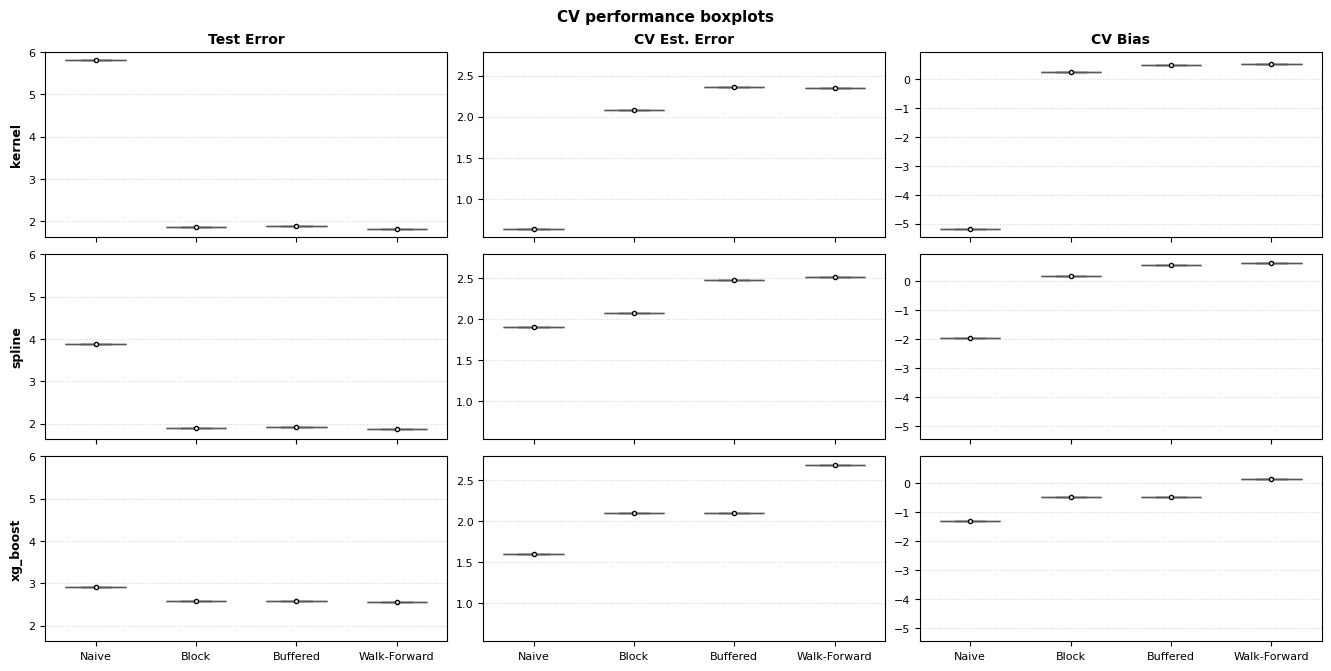

Saved fit grid to: figures/fit_air_quality_run.pdf


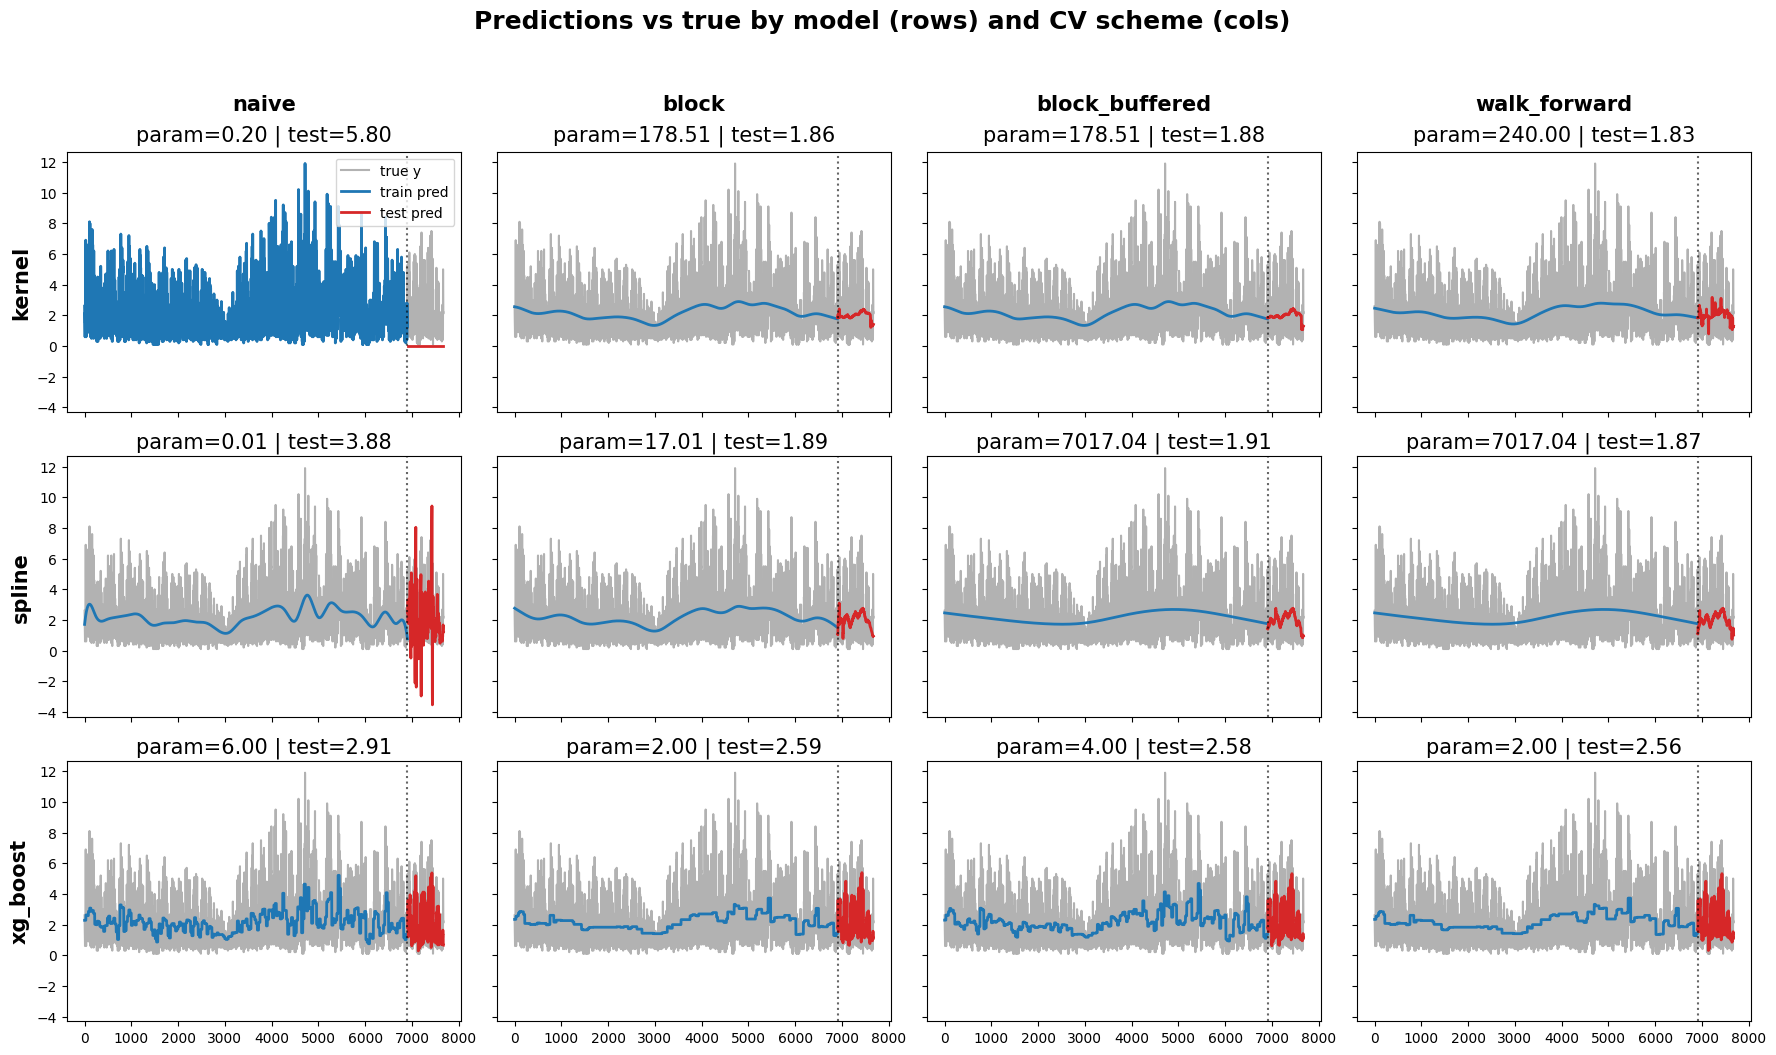

In [46]:
results = run_and_plot(
    model_specs,
    cv_schemes,
    dgp=None,                 
    x=x_train,
    y=y_train,
    x_test=x_test,
    y_test=y_test,
    replications=1,          
    base_seed=123,
    k_folds=5,
    buffer_l=35,
    rolling_test=True,        
    rolling_test_strategy="rolling",
    rolling_window=620,
    ahead_h=5,
    ahead_l=5,
    do_boxplots=True,
    do_fit_grid=False,        
    do_train_test_plot=False,
    save_csv_path="runs/air_quality_run/metrics.csv",
    model_run_name="runs/air_quality_run",  
    verbose=True,
    final_plot=True
)

## ARIMA

In [47]:
df = pd.read_csv("real_datasets/CNN-based stock market prediction/Processed_S&P.csv")

full_y = df["Close"].to_numpy()
x = np.arange(len(full_y))

split = int(0.9 * len(full_y))
y_train, y_test = full_y[:split], full_y[split:]
x_train, x_test = x[:split], x[split:]

Starting Benchmark: 1 Replications...
------------------------------------------------------------
Replication 1/1 | Elapsed: 0.0s | ETA: --
------------------------------------------------------------
Benchmark Complete. Total Time: 0.00s
[run_and_plot] No new replications were run (all skipped). Using existing saved data for plots if available.


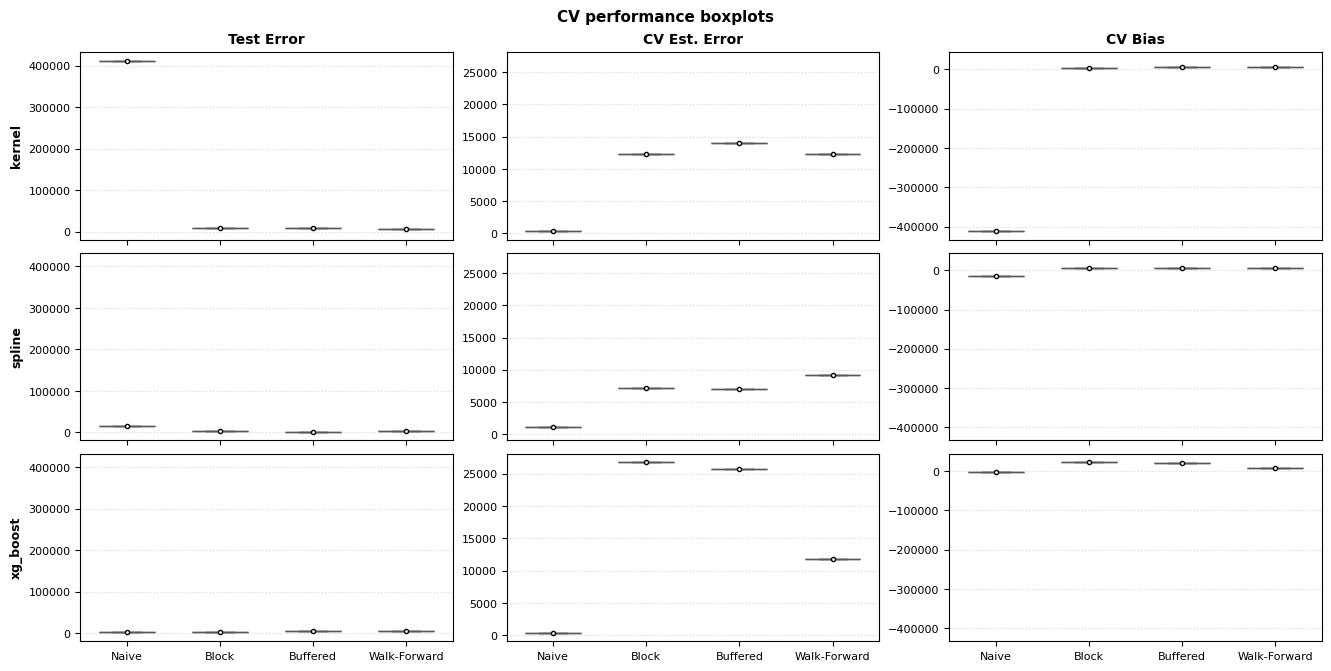

Saved fit grid to: figures/fit_sp500_run.pdf


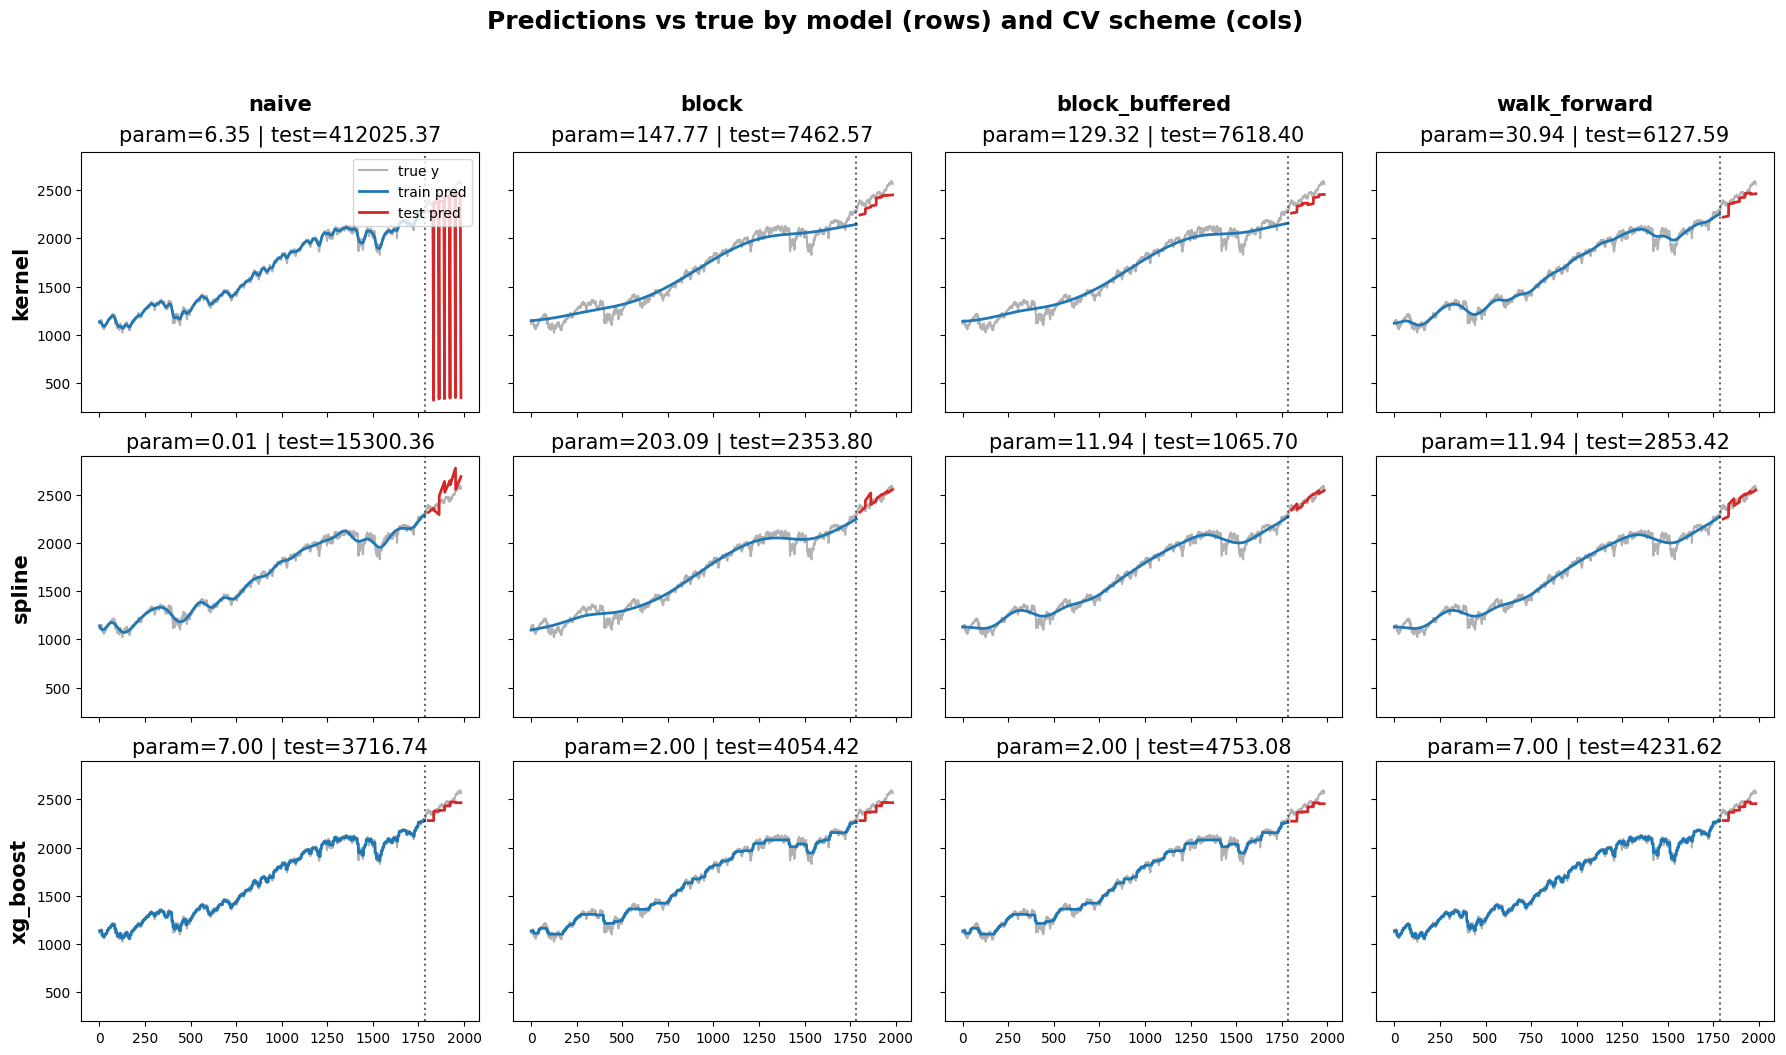

In [48]:
results_sp = run_and_plot(
    model_specs,
    cv_schemes,
    dgp=None,
    x=x_train,
    y=y_train,
    x_test=x_test,
    y_test=y_test,
    replications=1,
    base_seed=123,
    k_folds=5,
    buffer_l=35,
    rolling_test=True,
    rolling_test_strategy="rolling",
    rolling_window=620,
    ahead_h=20,
    ahead_l=30,
    do_boxplots=True,
    do_fit_grid=False,
    do_train_test_plot=False,
    save_csv_path="runs/sp500_run/metrics.csv",
    model_run_name="runs/sp500_run",
    verbose=True,
    final_plot=True,
)